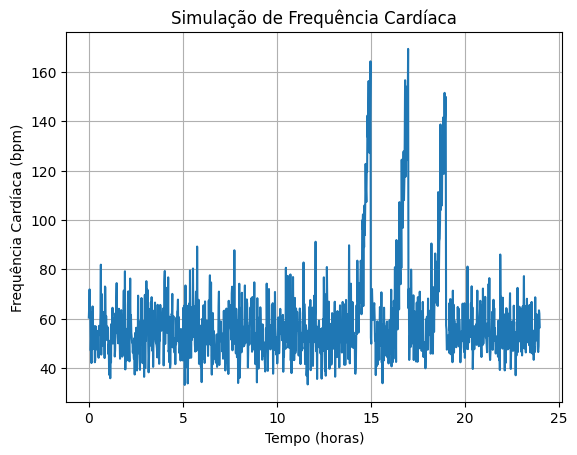

In [1]:
import numpy as np
import matplotlib.pyplot as plt

picos_horarios = [14, 16, 18]

tempo_total = 24
intervalo = 0.02

tempo = np.arange(0, tempo_total, intervalo)

frequencia_cardiaca = np.zeros_like(tempo)

duracao_pico = int(1 / intervalo)

limite_minimo = 50
limite_maximo = 160

tendencia = np.zeros_like(tempo)
for pico_horario in picos_horarios:
    indice_inicio_pico = int(pico_horario * (1 / intervalo))
    tendencia[indice_inicio_pico:indice_inicio_pico + duracao_pico] += np.linspace(0, 1, duracao_pico) ** 2
    
# Adicionar variações aleatórias à tendência
tendencia += np.random.normal(0, 0.1, len(tempo))

# Limitar os valores mínimos e máximos da tendência
tendencia = np.clip(tendencia, 0, 1)

# Multiplica a tendência pelos limites desejados para obter a frequência cardíaca
frequencia_cardiaca = tendencia * (limite_maximo - limite_minimo) + limite_minimo

# Adicionar um pouco de ruído aos dados
frequencia_cardiaca += np.random.normal(0, 5, len(tempo))

frequencia_cardiaca[0:indice_inicio_pico] += np.random.normal(0, 5, indice_inicio_pico)


plt.plot(tempo, frequencia_cardiaca)
plt.title('Simulação de Frequência Cardíaca')
plt.xlabel('Tempo (horas)')
plt.ylabel('Frequência Cardíaca (bpm)')
plt.grid(True)
plt.show()



# Utilizando o SDK da Azure IoT Hub

In [ ]:
import sys
import random
import time
from azure.iot.device import IoTHubDeviceClient, Message
import json

CONNECTION_STRING = "HostName=leonardo02221027.azure-devices.net;DeviceId=eagle13nari;SharedAccessKey=IoaI2nkEKv9Wee16lnruQfhO6jfjqEiNZAIoTCDUPrY="
DEVICE_ID = "eagle13nari"

def simulate_heart_rate():
    battery = 100.0
    timestamp = time.time()
    
    while True:
        current_time = time.localtime(timestamp)
        
        if current_time.tm_hour >= 0 and current_time.tm_hour < 6:
            heart_rate = random.randint(50, 60)
        elif current_time.tm_hour >= 6 and current_time.tm_hour < 12:
            heart_rate = random.randint(60, 80)
        elif current_time.tm_hour >= 14 and current_time.tm_hour < 16:
            heart_rate = random.randint(100, 120)
        elif current_time.tm_hour >= 16 and current_time.tm_hour < 18:
            heart_rate = random.randint(120, 140)
        else:
            heart_rate = random.randint(60, 80)
        
        battery -= 0.1

        data={
            "device_id": DEVICE_ID,
            "timestamp": timestamp,
            "heart_rate": heart_rate,
            "battery": battery
        }
        
        transmit_data(heart_rate, battery)
        time.sleep(120)
        
        timestamp = time.time()

def transmit_data(heart_rate, battery):
    try:
         client = IoTHubDeviceClient.create_from_connection_string(CONNECTION_STRING)

         payload = {
             "device_id": DEVICE_ID,
             "heart_rate": heart_rate,
             "battery": battery
         }

         message = Message(json.dumps(payload))

         client.send_message(message)
         print("Mensagem enviada para o IoT Hub:", message)
    except Exception as e:
        print("Erro ao enviar mensagem para o IoT Hub:", e)

simulate_heart_rate()

# Utilizando o MQTT

In [1]:
from paho.mqtt import client as mqtt
import time
import random
import datetime
import json
import random


def on_subscribe(client, userdata, mid, granted_qos):
    print('Subscribed for m' + str(mid))

def on_connect(client, userdata, flags, rc):
    print('Connected with result code ' + str(rc))

def on_log(client, userdata, level, buf):
    print('log: ' + buf)

device_id = "eagle13nari"
iot_hub_name = "leonardo02221027"
sas_token = "SharedAccessSignature sr=leonardo02221027.azure-devices.net%2Fdevices%2Feagle13nari&sig=jPKhr2eTHWmf0Q8uvClsD5udGIOZ5nqqiEy8o3Z364k%3D&se=1713550968"
client = mqtt.Client(client_id=device_id, protocol=mqtt.MQTTv311, clean_session=False)
client.tls_set_context(context=None)

username = "{}.azure-devices.net/{}/api-version=2018-06-30".format(iot_hub_name, device_id)
client.username_pw_set(username=username, password=sas_token)

client.on_connect = on_connect
client.connect(iot_hub_name+".azure-devices.net", port=8883)

time.sleep(1)

battery = 100.0
while True:
        timestamp = time.time()
        current_time = datetime.datetime.fromtimestamp(timestamp)

        if 0 <= current_time.hour < 6:
            heart_rate = random.randint(50,60)
        elif 6 <= current_time.hour < 12:
            heart_rate = random.randint(60,80)
        elif 14 <= current_time.hour < 16:
            heart_rate = random.randint(100,120)
        elif 16 <= current_time.hour < 18:
            heart_rate = random.randint(120,140)
        else:
            heart_rate = random.randint(60,80)

        battery -= 0.1

        data = {
            "device_id": device_id,
            "timestamp": timestamp,
            "heart_rate": heart_rate,
            "battery": battery
        } 

        client.publish("devices/{device_id}/messages/events/".format(device_id=device_id), payload=json.dumps(data), qos=2, retain=False)
        print("Publishing on devices/" + device_id + "/messages/events/",data)
        time.sleep(120)

Publishing on devices/eagle13nari/messages/events/ {'device_id': 'eagle13nari', 'timestamp': 1713549924.8747513, 'heart_rate': 112, 'battery': 99.9}
Publishing on devices/eagle13nari/messages/events/ {'device_id': 'eagle13nari', 'timestamp': 1713550044.8760166, 'heart_rate': 108, 'battery': 99.80000000000001}
